In [1]:
import geopandas as gpd

In [2]:
import json

# Replace with the path to your JSON file
json_file = 'SIP_CASA_0616.json'

# Open and load the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

data


[{'source': 'E01000001',
  'target': 'E01000001',
  'SIP_bi': 1.0,
  'SIP_pt': 1.0,
  'SIP_dr': 1.0},
 {'source': 'E01000001',
  'target': 'E01000002',
  'SIP_bi': 0.9631458936328678,
  'SIP_pt': 0.8789629730733941,
  'SIP_dr': 0.8707183731139179},
 {'source': 'E01000001',
  'target': 'E01000003',
  'SIP_bi': 0.9935792502079501,
  'SIP_pt': 0.9213699128733592,
  'SIP_dr': 0.9807630606695168},
 {'source': 'E01000001',
  'target': 'E01000005',
  'SIP_bi': 0.8887174024390361,
  'SIP_pt': 0.8445066235962299,
  'SIP_dr': 0.7096064472760542},
 {'source': 'E01000001',
  'target': 'E01000139',
  'SIP_bi': 0.0938673085364988,
  'SIP_pt': 0.07641211128551605,
  'SIP_dr': 0.40512511101168963},
 {'source': 'E01000001',
  'target': 'E01000141',
  'SIP_bi': 0.05395116983175004,
  'SIP_pt': 0.2056385874716592,
  'SIP_dr': 0.38813892670958},
 {'source': 'E01000001',
  'target': 'E01000143',
  'SIP_bi': 0.07843087528582204,
  'SIP_pt': 0.14905176793527303,
  'SIP_dr': 0.3625159771224728},
 {'source': '

In [3]:
import geopandas as gpd
import os
import glob
import pandas as pd
# Path where all shapefiles are located
shapefile_dir = "geo"  # Replace with your directory path
output_geojson = "aggregated.geojson"

# Collect all shapefile paths
shapefiles = glob.glob(os.path.join(shapefile_dir, "*.shp"))

# Read and concatenate all shapefiles into a single GeoDataFrame
gdfs = []
for shp in shapefiles:
    gdf = gpd.read_file(shp).to_crs("EPSG:4326")  # Convert CRS to WGS84
    gdfs.append(gdf)

# Combine into a single GeoDataFrame
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Save to GeoJSON
combined_gdf.to_file(output_geojson, driver='GeoJSON')

print(f"Saved aggregated GeoJSON to {output_geojson}")


Saved aggregated GeoJSON to aggregated.geojson


<Axes: >

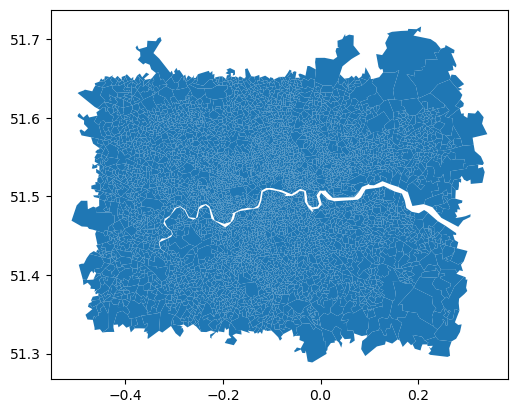

In [10]:
gdf = gpd.read_file("London.geojson")
gdf.plot()

In [11]:
import geopandas as gpd

# Assuming you already have a GeoDataFrame (gdf)
# Replace with your desired output file path
geojson_path = 'camden.geojson'

# Save the GeoDataFrame as a GeoJSON file
gdf.to_file(geojson_path, driver='GeoJSON')

import geopandas as gpd
from shapely.geometry import Point


# Ensure the data is in the correct coordinate reference system (CRS)
gdf = gdf.to_crs("EPSG:4326")

# Calculate the centroids of the geometries in the GeoDataFrame
gdf['centroid'] = gdf.geometry.centroid

# Calculate the mean x and y coordinates of the centroids
mean_x = gdf['centroid'].x.mean()
mean_y = gdf['centroid'].y.mean()

# The mean centroid is the point with mean_x and mean_y
mean_centroid = Point(mean_x, mean_y)

# Create a GeoDataFrame to store the mean centroid
mean_centroid_gdf = gpd.GeoDataFrame(geometry=[mean_centroid], crs=gdf.crs)

# View the mean centroid
print("Mean Centroid:", mean_centroid_gdf)


Mean Centroid:                     geometry
0  POINT (-0.11713 51.50247)


/var/folders/2w/9xqgx8zx23x0sxltmvyhdk2h0000gn/T/ipykernel_4101/3685293755.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


In [ ]:
mean_centroid_gdf.plot()